# Todas las predicciones

In [1]:
%%time
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pandas.plotting import autocorrelation_plot
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import os

os.getcwd()

Wall time: 3.11 s


'C:\\Users\\marin\\Documents\\Controlador PID\\Bases'

## Abrir la BM y filtrar sólo por salidas a partir de enero del 2018

In [2]:
%%time
#Tomar datos que son desde el 2018
BM  = pd.read_csv('BM.csv')
lista = pd.read_csv('articulos_experimento.csv')

BM["Fecha"]=pd.to_datetime(BM.Fecha)
BM = BM[BM["Fecha"]>="2018-01-01"]
BM['Semana'] = pd.to_datetime(BM.Fecha.dt.week.astype(str)+BM.Fecha.dt.year.astype(str).add('-1') ,format='%V%G-%u')
BM['Cantidad'] = pd.to_numeric(BM['Cantidad'], errors='coerce')
BM["Entrada_Salida"]  = pd.to_numeric(BM["Entrada_Salida"], errors="coerce")
BM= BM[BM["Entrada_Salida"]==1]

Wall time: 5.85 s


In [3]:
len(BM)

1670576

In [4]:
%%time
data_weekly_grouped = BM.reset_index() \
                          .groupby('IdArticulo') \
                          .resample('W-MON', on='Fecha', label='left',closed='left')
data_weekly = pd.DataFrame(data_weekly_grouped.sum()['Cantidad']).reset_index().set_index('IdArticulo')
data_weekly = data_weekly.reset_index()
data_weekly["Semana"]=data_weekly["Fecha"]

Wall time: 14.5 s


### Contar el número de semanas que han transcurrido desde Enero del 2018

In [5]:
%%time
semanas=len(data_weekly.groupby("Semana").count())
print("Han Transcurrido:",semanas,"Semanas desde Enero del 2018")

Han Transcurrido: 148 Semanas desde Enero del 2018
Wall time: 18.5 ms


## Lista de los artículos que se encuentran en la base

In [53]:
%%time
#Lista de todos los articulos
lista=data_weekly[["IdArticulo", "Cantidad"]].groupby("IdArticulo").sum().sort_values("Cantidad", ascending=False).reset_index()["IdArticulo"].values;
len(lista)

Wall time: 11.7 ms


4103

In [56]:
lista = pd.read_csv('articulos_experimento.csv')
lista = lista["0"].to_numpy()

### Tomar los articulos que se han pedido de manera ininterrumpida durante todas las semanas desde el 2018

In [45]:
%%time
#Tomar los articulos que se han pedido de manera ininterrumpida durante todas las semanas desde el 2018
prueba=data_weekly[["Semana", "IdArticulo"]]

IdArticulo=[]
hola=[]

for i in lista:
    siempre=len(prueba[prueba["IdArticulo"]==i].groupby("Semana").count())
    hola.append(siempre)
    IdArticulo.append(i)
d={"IdArticulo":IdArticulo, "Siempre":hola}
df=pd.DataFrame(data=d)
lista_ininterrumpidos=df[df["Siempre"]==semanas].IdArticulo.values

# Lista

rango=len(lista_ininterrumpidos)
print(rango)
lista_ininterrumpidos

154
Wall time: 4.82 s


array([3600021., 3301668., 3800068., 3800067., 3800069., 1000307.,
       1000077., 3400007., 3800064., 1000060., 3800065., 3600143.,
       3800051., 3600092., 1000069., 1000097., 1000210., 3304813.,
       1000124., 3800035., 3600146., 1000063., 1000082., 3600088.,
       3800066., 1000209., 1000051., 3600085., 3400132., 1000243.,
       1000182., 3600199., 1000235., 3600103., 1000056., 3600024.,
       3800012., 3600031., 3600207., 3301002., 1000187., 3800013.,
       3600071., 1000177., 1000259., 1000123., 3600164., 3600073.,
       1000278., 3301257., 3400022., 1000042., 3600083., 1000204.,
       3600061., 3400053., 1000072., 1000261., 1000193.,  800362.,
       3600136., 3302785., 3302139., 3600029., 3400137., 3600050.,
       1000053., 3301068., 3600096., 1000071., 3304575., 1000201.,
       1000215., 1000191., 3600023., 3800016.,  700024.,  700043.,
       1000070., 3800011., 1000207., 3600027., 1000119., 3800014.,
       3301771., 3302196., 3600026., 1000031., 3302098., 38000

In [57]:
BM = data_weekly

## Tomar un medicamento de manera aleatoria para aplicar los algoritmos de predicción.

Medicamento: 1000028.0
Wall time: 32.1 ms


Text(0.5, 1.0, '1000028.0')

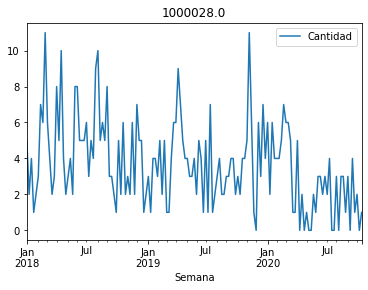

In [71]:
%%time
#Tomar de manera aleatoria un medicamento de la lista de ininterrumpidos

i= random.randint(0,rango-1)

Medicamento = BM[BM["IdArticulo"]== lista_ininterrumpidos[i]]
SerieTiempo = Medicamento[["Semana", "Cantidad"]].groupby("Semana").sum() ; 
print("Medicamento:",lista_ininterrumpidos[i])
Prueba      = SerieTiempo[-1:];
SerieTiempo = SerieTiempo[0:-1]


SerieTiempo.plot()
plt.title(str(lista_ininterrumpidos[i]))

## ARIMA

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=657.686, Time=3.09 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=676.124, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=661.532, Time=2.03 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=668.560, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=854.764, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=656.675, Time=0.05 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=657.813, Time=3.72 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=9.72 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=667.413, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=660.765, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=652.910, Time=0.06 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=653.339, Time=4.21 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=653.095, Time=2.91 sec
 ARIMA(2,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=9.04 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AI

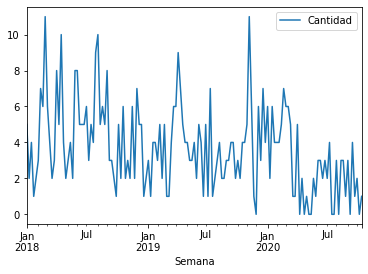

In [72]:
#Crear el vector a pronosticar
x=pm.c(SerieTiempo.Cantidad)

# Estimar las veces a diferenciar la serie en cuestion con el ADF Test:
n_adf = ndiffs(x, test='adf')  # -> 0

#Estimar el número de diferenciación "seasonal"
seasonal= pm.arima.nsdiffs(x, m=52, test='ocsb')

#Calcular el ARIMA
modl = pm.auto_arima(x, start_p=1, start_q=1,start_Q=1,
                             max_p=3, max_q=3, m=52,
                             start_P=0, seasonal=True,
                             d=n_adf, D=seasonal, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

# Create predictions for the future, evaluate on test
preds, conf_int  = modl.predict(n_periods=1, return_conf_int=True)

prediccion_arima = preds[0].round()

SerieTiempo.plot()
print("Medicamento:",lista_ininterrumpidos[i])
print("Predicción ARIMA:",prediccion_arima)
print("Semana:", )
# Error Absoluto de Predicción
print("Cantidad de Error:",(Prueba["Cantidad"][0] - prediccion_arima) )

## Algorítmos de media movil y exponencial

Wall time: 15 ms


,Cantidad,MediaMovil_4,MediaMovil_8,MediaExponencial_4,MediaExponencial_8
Semana,,,,,
2018-01-01,5.0,NaN,NaN,NaN,NaN
2018-01-08,2.0,NaN,NaN,NaN,NaN
2018-01-15,4.0,NaN,NaN,NaN,NaN
2018-01-22,1.0,3.00,NaN,2.723577,NaN
2018-01-29,2.0,2.25,NaN,2.508329,NaN
...,...,...,...,...,...
2020-09-21,4.0,2.00,2.125,2.124254,2.094741
2020-09-28,1.0,2.00,1.875,1.899403,1.973103
2020-10-05,2.0,1.75,2.125,1.919522,1.976091


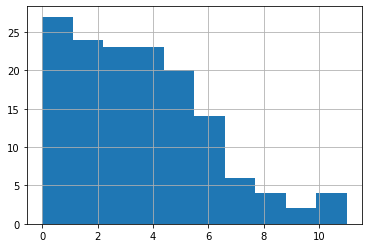

In [95]:
%%time

#Eliminiamos el valor a predecir
SlidingWindow=SerieTiempo;

#Algoritmos de predicción
SlidingWindow['MediaMovil_4']       = SlidingWindow.iloc[:,0].rolling(window=4).mean();

SlidingWindow['MediaMovil_8']       = SlidingWindow.iloc[:,0].rolling(window=8).mean();

SlidingWindow['MediaExponencial_4'] = SlidingWindow.iloc[:,0].ewm(com= 4, min_periods = 4,adjust=True).mean();SlidingWindow;SlidingWindow["Cantidad"].hist();

SlidingWindow['MediaExponencial_8'] = SlidingWindow.iloc[:,0].ewm(com= 8, min_periods = 8,adjust=True).mean();SlidingWindow;


In [96]:
SlidingWindow[-1:].iloc[0]["MediaMovil_8"].round()

2.0

Text(0.5, 1.0, '3302073.0')

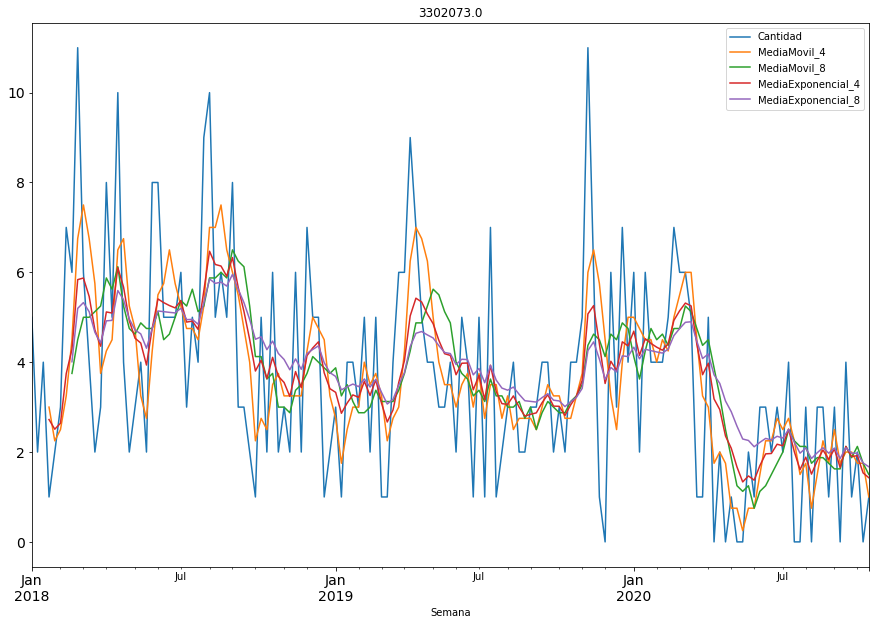

In [74]:
SlidingWindow.plot(figsize=(15,10))
plt.tick_params(labelsize=14)
plt.title(str(lista[i]))

In [75]:
SlidingWindow.tail(5)

,Cantidad,MediaMovil_4,MediaMovil_8,MediaExponencial_4,MediaExponencial_8
Semana,,,,,
2020-09-21,4.0,2.00,2.125,2.124254,2.094741
2020-09-28,1.0,2.00,1.875,1.899403,1.973103
2020-10-05,2.0,1.75,2.125,1.919522,1.976091
2020-10-12,0.0,1.75,1.750,1.535618,1.756526
2020-10-19,1.0,1.00,1.500,1.428494,1.672467


## Suavizamiento exponencial y Holt Winters Filter.

C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


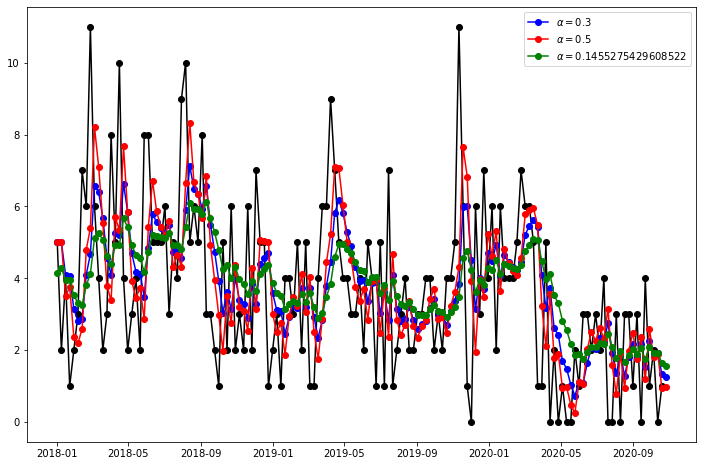

In [76]:
#Filtros de prediccion

serie=SlidingWindow["Cantidad"]

fit1 = SimpleExpSmoothing(serie).fit(smoothing_level=0.3,optimized=False)
fcast1 = fit1.forecast(1).rename(r'$\alpha=0.3$')
fit2 = SimpleExpSmoothing(serie).fit(smoothing_level=0.5,optimized=False)
fcast2 = fit2.forecast(1).rename(r'$\alpha=0.5$')
fit3 = SimpleExpSmoothing(serie).fit()
fcast3 = fit3.forecast(1).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

#Figura
plt.figure(figsize=(12, 8))
plt.plot(serie, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\marin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


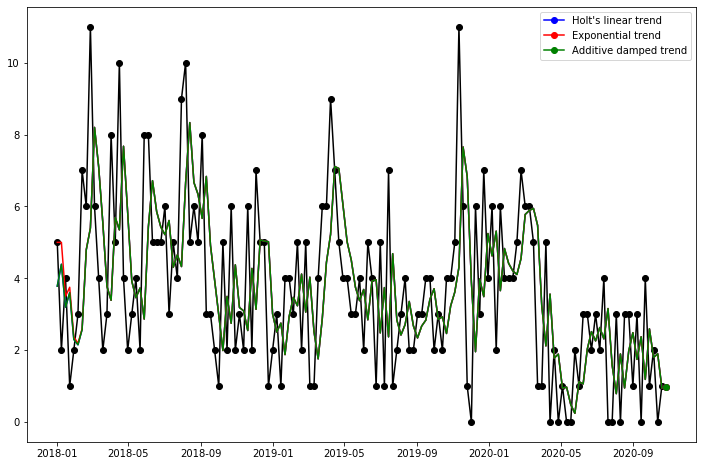

In [84]:
# Holts Method

serie= SlidingWindow["Cantidad"]

fit1 = Holt(serie).fit(smoothing_level=0.5)
fcast4 = fit1.forecast(1).rename("Holt's linear trend")
fit2 = Holt(serie, exponential=True).fit(smoothing_level=0.5)
fcast5 = fit2.forecast(1).rename("Exponential trend")
fit3 = Holt(serie).fit(smoothing_level=0.5)
fcast6 = fit3.forecast(1).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(serie, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast4, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast5, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast6, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast4.name, fcast5.name, fcast6.name])

In [78]:
print(
    Prueba["Cantidad"][0:2].values-round(fcast1[0]),
    Prueba["Cantidad"][0:2].values-round(fcast2[0]),
    Prueba["Cantidad"][0:2].values-round(fcast3[0]),
    Prueba["Cantidad"][0:2].values-round(fcast4[0]),
    Prueba["Cantidad"][0:2].values-round(fcast5[0]),
    Prueba["Cantidad"][0:2].values-round(fcast6[0]))

[0.] [0.] [-1.] [0.] [-8.] [-13.]


In [79]:
SlidingWindow[-1:].iloc[0]

Cantidad              1.000000
MediaMovil_4          1.000000
MediaMovil_8          1.500000
MediaExponencial_4    1.428494
MediaExponencial_8    1.672467
Name: 2020-10-19 00:00:00, dtype: float64

In [80]:
#Predicciones
IdArticulo    = lista_ininterrumpidos[i]
Cantidad_Real = Prueba["Cantidad"][0]
MM4           = SlidingWindow[-1:].iloc[0]["MediaMovil_4"].round()
MM8           = SlidingWindow[-1:].iloc[0]["MediaMovil_8"].round()
ME4           = SlidingWindow[-1:].iloc[0]["MediaExponencial_4"].round()
ME8           = SlidingWindow[-1:].iloc[0]["MediaExponencial_8"].round()
SES3          = round(fcast1[0])
SES5          = round(fcast2[0])
SESA          = round(fcast3[0])
HLT           = round(fcast4[0])
HET           = round(fcast5[0])
HAT           = round(fcast6[0])

In [81]:
d= {"IdArticulo": [IdArticulo],"Cantidad Real": [Cantidad_Real], "ARIMA":[prediccion_arima ], "MM4": [MM4], "MM8": [MM8], "ME4":[ME4], "ME8":[ME8], "SES3":[SES3], "SES5":[SES5], "SESA":[SESA], "HLT":[HLT], "HET":[HET], "HAT": [HAT]}
df = pd.DataFrame(data=d); df

,IdArticulo,Cantidad Real,ARIMA,MM4,MM8,ME4,ME8,SES3,SES5,SESA,HLT,HET,HAT
0,1000028.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,9.0,14.0
